In [33]:
import pandas as pd
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
file = 'forestfires'

In [3]:
df = pd.read_csv(file+'.csv')

In [4]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:
df.fillna(value=0,inplace=True)

In [6]:
feature_cols = df.columns.values[0:-1]

In [7]:
df.fillna(value=0,inplace=True)

In [8]:
out_col = df.columns.values[-1]

In [9]:
feature_cols = df.columns.values[0:-1]

In [10]:
print(feature_cols)

['X' 'Y' 'month' 'day' 'FFMC' 'DMC' 'DC' 'ISI' 'temp' 'RH' 'wind' 'rain']


In [11]:
print(out_col)

area


In [13]:
bins = [0, 5, 40, 1100]
labels = [0,1,2]
df.area = pd.cut(df['area'], include_lowest=True, bins=bins, labels=labels)

df.month = df.month.astype('category').cat.codes
df.day = df.day.astype('category').cat.codes

In [14]:
feature_cols = df.columns.values[0:-1]

In [17]:
x = df[feature_cols]

In [18]:
y = df[out_col]

In [19]:
print(x.head())

   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  7  5      7    0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4     10    5  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  7  4     10    2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  8  6      7    0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  8  6      7    3  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0


In [20]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: area, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state = 1)

In [22]:
clf = DecisionTreeClassifier(max_depth=3)

In [23]:
clf = clf.fit(x_train,y_train)

In [24]:
y_test_pred = clf.predict(x_test)

In [25]:
y_train_pred = clf.predict(x_train)

In [35]:
print("Test: ",y_test.describe().freq / y_test.count())

Test:  0.7243589743589743


In [36]:
print("Train: ",y_train.describe().freq / y_train.count())

Train:  0.7008310249307479



Test Results
Accuracy: 0.7307692307692307
[[111   2   0]
 [ 31   3   0]
 [  8   1   0]]


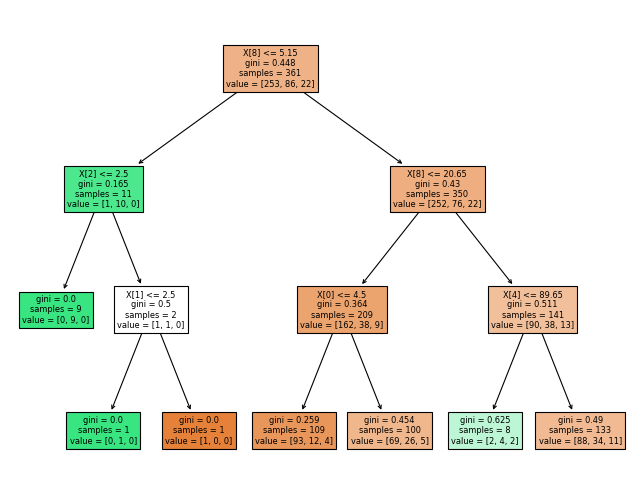

In [37]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show();